In [1]:
# импорт бибилиотек 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

from matplotlib import pyplot as plt

In [2]:
# Чтобы часть столбцов в дальнейшем не скрывалась, настроим принудительное отображение
pd.set_option('display.max_colwidth', None)

##  Изучение общей информации о данных

In [3]:
# загружаем данные из эксель файла
excel_data_1= pd.read_excel('/Users/popov/Downloads/Новая таблица 1тестовое данные.xlsx')
df = pd.DataFrame(excel_data_1)
display(df.head(10))
display(df.info())

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Регион,Группа АТХ,МНН,Лекарственная форма,Дозировка,"Обеспеченность, месяцев","Остатки, упаковок",Тип
2,NaN,МОСКВА,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ СЕРДЕЧНО-СОСУДИСТОЙ СИСТЕМЫ,НИФЕДИПИН,"ТАБЛЕТКИ С ПРОЛОНГИРОВАННЫМ ВЫСВОБОЖДЕНИЕМ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",30 мг,1.8,26896,анализ проведен ранее
3,NaN,МОСКВА,"ПРЕПАРАТЫ, ВЛИЯЮЩИЕ НА ПИЩЕВАРИТЕЛЬНЫЙ ТРАКТ И ОБМЕН ВЕЩЕСТВ",ОМЕПРАЗОЛ,"ТАБЛЕТКИ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",20 мг,2.9,455,анализ проведен ранее
4,NaN,МОСКВА,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТЕМЫ,ПАРОКСЕТИН,"ТАБЛЕТКИ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",20 мг,2.5,6295,новое
5,NaN,МОСКВА,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ СЕРДЕЧНО-СОСУДИСТОЙ СИСТЕМЫ,ПЕРИНДОПРИЛ,"ТАБЛЕТКИ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",4 мг,0.1,248,анализ проведен ранее
6,NaN,МОСКВА,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТЕМЫ,ПИРАЦЕТАМ,"ТАБЛЕТКИ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",400 мг,2.5,1495,анализ проведен ранее
7,NaN,МОСКВА,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ МОЧЕПОЛОВОЙ СИСТЕМЫ И ПОЛОВЫЕ ГОРМОНЫ,ТАМСУЛОЗИН,КАПСУЛЫ С МОДИФИЦИРОВАННЫМ ВЫСВОБОЖДЕНИЕМ,0.4 мг,1.8,44552,анализ проведен ранее
8,NaN,МОСКВА,ГОРМОНАЛЬНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗОВАНИЯ (ИСКЛЮЧАЯ ПОЛОВЫЕ ГОРМОНЫ),ТИАМАЗОЛ,ТАБЛЕТКИ,5 мг,2.6,753,новое
9,NaN,МОСКВА,"ПРЕПАРАТЫ, ВЛИЯЮЩИЕ НА ПИЩЕВАРИТЕЛЬНЫЙ ТРАКТ И ОБМЕН ВЕЩЕСТВ",ТИОКТОВАЯ КИСЛОТА,РАСТВОР ДЛЯ ИНФУЗИЙ,12 мг/мл,2.1,1520,новое


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  531 non-null    object 
 2   Unnamed: 2  531 non-null    object 
 3   Unnamed: 3  531 non-null    object 
 4   Unnamed: 4  531 non-null    object 
 5   Unnamed: 5  523 non-null    object 
 6   Unnamed: 6  531 non-null    object 
 7   Unnamed: 7  531 non-null    object 
 8   Unnamed: 8  531 non-null    object 
dtypes: float64(1), object(8)
memory usage: 37.5+ KB


None

<div class="alert alert-info"> Первичная выгрузка данных выявила неудобный формат таблицы для работы . В кодах ниже приведем таблицу к нужному виду озаглавив столбцы и  убрав лишние строки без информации 

##  Предобработка данных 

In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [5]:
df = df.rename(columns={'Unnamed: 1': 'Регион', 
                        'Unnamed: 2': 'Группа АТХ',
                        'Unnamed: 3': 'МНН',
                        'Unnamed: 4': 'Лекарственная форма',
                        'Unnamed: 5': 'Дозировка',
                        'Unnamed: 6': 'Обеспеченность, месяцев',
                        'Unnamed: 7': 'Остатки упаковок',
                        'Unnamed: 8': 'Тип' })

In [6]:
df.drop(labels = [0,1],axis = 0, inplace = True)

In [7]:
df.drop (df.columns [[0]], axis= 1 , inplace= True )

In [8]:
df

,Регион,Группа АТХ,МНН,Лекарственная форма,Дозировка,"Обеспеченность, месяцев",Остатки упаковок,Тип
2,МОСКВА,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ СЕРДЕЧНО-СОСУДИСТОЙ СИСТЕМЫ,НИФЕДИПИН,"ТАБЛЕТКИ С ПРОЛОНГИРОВАННЫМ ВЫСВОБОЖДЕНИЕМ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",30 мг,1.8,26896,анализ проведен ранее
3,МОСКВА,"ПРЕПАРАТЫ, ВЛИЯЮЩИЕ НА ПИЩЕВАРИТЕЛЬНЫЙ ТРАКТ И ОБМЕН ВЕЩЕСТВ",ОМЕПРАЗОЛ,"ТАБЛЕТКИ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",20 мг,2.9,455,анализ проведен ранее
4,МОСКВА,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТЕМЫ,ПАРОКСЕТИН,"ТАБЛЕТКИ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",20 мг,2.5,6295,новое
5,МОСКВА,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ СЕРДЕЧНО-СОСУДИСТОЙ СИСТЕМЫ,ПЕРИНДОПРИЛ,"ТАБЛЕТКИ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",4 мг,0.1,248,анализ проведен ранее
6,МОСКВА,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТЕМЫ,ПИРАЦЕТАМ,"ТАБЛЕТКИ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",400 мг,2.5,1495,анализ проведен ранее
...,...,...,...,...,...,...,...,...
527,МОСКВА,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ КОСТНО-МЫШЕЧНОЙ СИСТЕМЫ,КЕТОПРОФЕН,СУППОЗИТОРИИ РЕКТАЛЬНЫЕ,160 мг,0.3,11,анализ проведен ранее
528,МОСКВА,ПРЕПАРАТЫ ДЛЯ ЛЕЧЕНИЯ ЗАБОЛЕВАНИЙ НЕРВНОЙ СИСТЕМЫ,ЛОРАЗЕПАМ,"ТАБЛЕТКИ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",1 мг,0,0,анализ проведен ранее
529,МОСКВА,"ПРЕПАРАТЫ, ВЛИЯЮЩИЕ НА КРОВЕТВОРЕНИЕ И КРОВЬ",ФАКТОР СВЕРТЫВАНИЯ КРОВИ VIII+ФАКТОР ВИЛЛЕБРАНДА,ЛИОФИЛИЗАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНФУЗИЙ,1000 МЕ+1200 МЕ,0,0,новое
530,МОСКВА,ПРОТИВОМИКРОБНЫЕ ПРЕПАРАТЫ ДЛЯ СИСТЕМНОГО ИСПОЛЬЗОВАНИЯ,АМИНОСАЛИЦИЛОВАЯ КИСЛОТА,"ТАБЛЕТКИ, ПОКРЫТЫЕ ОБОЛОЧКОЙ",200 мг,0.8,1,новое


In [9]:
# подсчет пропусков
df.isna().sum()

Регион                     0
Группа АТХ                 0
МНН                        0
Лекарственная форма        0
Дозировка                  8
Обеспеченность, месяцев    0
Остатки упаковок           0
Тип                        0
dtype: int64

<div class="alert alert-info"> Имеются 8 пропусков в столбце дозировка , но  в данном случае нужно вручную анализировать и заполнять каждый 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 2 to 531
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Регион                   530 non-null    object
 1   Группа АТХ               530 non-null    object
 2   МНН                      530 non-null    object
 3   Лекарственная форма      530 non-null    object
 4   Дозировка                522 non-null    object
 5   Обеспеченность, месяцев  530 non-null    object
 6   Остатки упаковок         530 non-null    object
 7   Тип                      530 non-null    object
dtypes: object(8)
memory usage: 33.3+ KB


<div class="alert alert-info"> В столбцах обнаружен не соотвествующий формат числовых данных. Приведем данные к нужному виду в столбцах: 'Обеспеченность, месяцев' и 'Остатки упаковок'         

In [11]:
# замена объектного типа данных  типа данных в столбце на  целочисленный 
df['Остатки упаковок']=df['Остатки упаковок'].astype('int')
display(df['Остатки упаковок'])

2      26896
3        455
4       6295
5        248
6       1495
       ...  
527       11
528        0
529        0
530        1
531        9
Name: Остатки упаковок, Length: 530, dtype: int32

In [12]:
# замена объектного типа данных  типа данных в столбце на вещественное число
df['Обеспеченность, месяцев']=df['Обеспеченность, месяцев'].astype('float')
display(df['Обеспеченность, месяцев'])

2      1.8
3      2.9
4      2.5
5      0.1
6      2.5
      ... 
527    0.3
528    0.0
529    0.0
530    0.8
531    1.0
Name: Обеспеченность, месяцев, Length: 530, dtype: float64

In [13]:
# приведем строки в столбцах к необходимому в задании формату
df['Регион']=df['Регион'].str.capitalize()
df['Группа АТХ']=df['Группа АТХ'].str.capitalize()
df['МНН']=df['МНН'].str.capitalize()
df['Лекарственная форма']=df['Лекарственная форма'].str.capitalize()
df.head(10)

,Регион,Группа АТХ,МНН,Лекарственная форма,Дозировка,"Обеспеченность, месяцев",Остатки упаковок,Тип
2,Москва,Препараты для лечения заболеваний сердечно-сосудистой системы,Нифедипин,"Таблетки с пролонгированным высвобождением, покрытые оболочкой",30 мг,1.8,26896,анализ проведен ранее
3,Москва,"Препараты, влияющие на пищеварительный тракт и обмен веществ",Омепразол,"Таблетки, покрытые оболочкой",20 мг,2.9,455,анализ проведен ранее
4,Москва,Препараты для лечения заболеваний нервной системы,Пароксетин,"Таблетки, покрытые оболочкой",20 мг,2.5,6295,новое
5,Москва,Препараты для лечения заболеваний сердечно-сосудистой системы,Периндоприл,"Таблетки, покрытые оболочкой",4 мг,0.1,248,анализ проведен ранее
6,Москва,Препараты для лечения заболеваний нервной системы,Пирацетам,"Таблетки, покрытые оболочкой",400 мг,2.5,1495,анализ проведен ранее
7,Москва,Препараты для лечения заболеваний мочеполовой системы и половые гормоны,Тамсулозин,Капсулы с модифицированным высвобождением,0.4 мг,1.8,44552,анализ проведен ранее
8,Москва,Гормональные препараты для системного использования (исключая половые гормоны),Тиамазол,Таблетки,5 мг,2.6,753,новое
9,Москва,"Препараты, влияющие на пищеварительный тракт и обмен веществ",Тиоктовая кислота,Раствор для инфузий,12 мг/мл,2.1,1520,новое
10,Москва,"Препараты, влияющие на пищеварительный тракт и обмен веществ",Тиоктовая кислота,"Таблетки, покрытые оболочкой",600 мг,2.4,10966,анализ проведен ранее
11,Москва,Препараты для лечения заболеваний нервной системы,Трамадол,Капсулы,50 мг,2.8,9922,анализ проведен ранее


## Исследовательский анализ данных

In [14]:
# Просмотр уникальных названий в столбце
df['Группа АТХ'].sort_values().unique() 

array(['Гормональные препараты для системного использования (исключая половые гормоны)',
       'Препараты для лечения заболеваний кожи',
       'Препараты для лечения заболеваний костно-мышечной системы',
       'Препараты для лечения заболеваний мочеполовой системы и половые гормоны',
       'Препараты для лечения заболеваний нервной системы',
       'Препараты для лечения заболеваний органов чувств',
       'Препараты для лечения заболеваний респираторной системы',
       'Препараты для лечения заболеваний сердечно-сосудистой системы',
       'Препараты, влияющие на кроветворение и кровь',
       'Препараты, влияющие на пищеварительный тракт и обмен веществ',
       'Противомикробные препараты для системного использования',
       'Противоопухолевые препараты и иммуномодуляторы',
       'Противопаразитарные препараты, инсектициды и репелленты',
       'Прочие лекарственные препараты'], dtype=object)

In [15]:
#сводная таблица остатков упаковок по группам препаратов отсортированныя по убыванию 
df_gr=df.pivot_table(index='Группа АТХ', values='Остатки упаковок',aggfunc='sum').sort_values(by='Остатки упаковок', ascending=False)
df_gr

,Остатки упаковок
Группа АТХ,
Препараты для лечения заболеваний сердечно-сосудистой системы,1077822
"Препараты, влияющие на пищеварительный тракт и обмен веществ",1070025
Противомикробные препараты для системного использования,700513
Препараты для лечения заболеваний нервной системы,276493
Противоопухолевые препараты и иммуномодуляторы,229662
Препараты для лечения заболеваний респираторной системы,215843
Препараты для лечения заболеваний костно-мышечной системы,108583
"Препараты, влияющие на кроветворение и кровь",101751
Препараты для лечения заболеваний мочеполовой системы и половые гормоны,88524


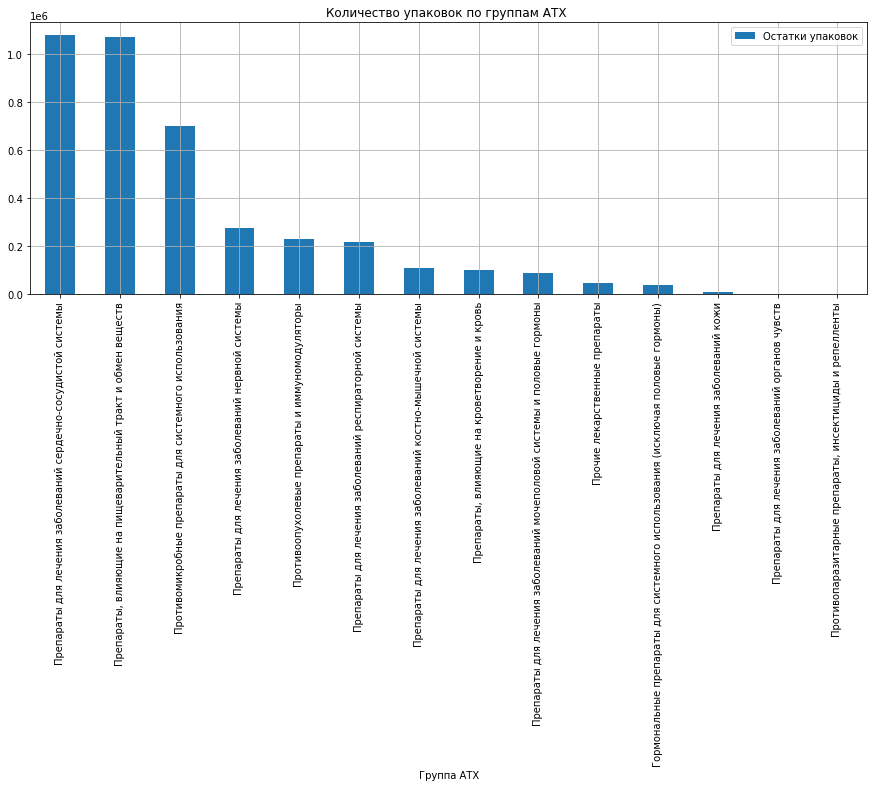

In [16]:
df_gr.reset_index().plot(x='Группа АТХ', y= 'Остатки упаковок', kind='bar', figsize=(15,5), grid=True, title='Количество упаковок по группам АТХ ')


plt.show()

In [17]:
df.to_excel('df.xlsx', index=False)

In [ ]:
Ссылка на дашборд 

https://public.tableau.com/shared/KB2J8NBMZ?:display_count=n&:origin=viz_share_link